In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
business = pd.read_json("data/yelp_dataset/yelp_academic_dataset_business.json", lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
# count the number of business in each state
state_count = business.groupby('state').size().reset_index(name='count')
state_count

,state,count
0,AB,5573
1,AZ,9912
2,CA,5203
3,CO,3
4,DE,2265
5,FL,26330
6,HI,2
7,ID,4467
8,IL,2145
9,IN,11247


In [4]:
# get a slice of business data for NV only
nv_business = business[business['state'] == 'NV']

# check if there are any missing values
print(nv_business.isnull().sum())

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       856
categories         9
hours           1261
dtype: int64


In [5]:
# fill the missing values in nv_business 

# fill 'attributes' with {'Unknown': True}
nv_business['attributes'] = nv_business['attributes'].fillna('Unknown')

# fill 'hours' with 'Unknown'
nv_business['hours'] = nv_business['hours'].fillna('Unknown')

# drop the missing values in 'categories' 
nv_business.dropna(subset=['categories'], inplace=True)

/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_94415/567452830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_business['attributes'] = nv_business['attributes'].fillna('Unknown')
/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_94415/567452830.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_business['hours'] = nv_business['hours'].fillna('Unknown')
/var/folders/zs/j91wn79j45lccf78212k1pp80000gn/T/ipykernel_94415/567452830.py:10: SettingWithCopyWarning: 
A value is trying

In [6]:
# check if there are any missing values
print(nv_business.isnull().sum())

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


In [7]:
nv_business_ids = nv_business['business_id'].tolist()

print(nv_business.shape)
nv_business.head()

(7706, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
39,fSCNwMtNNQY9QT69Cj9fiA,Sierra Pro Events,,Sparks,NV,89431,39.540154,-119.748395,5.0,7,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Musicians, DJs, Karaoke, Event Planning & Serv...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
70,gbN4RuUiiBxQ2GBFQ2p3Cw,Mr. Margarita,Truck Inn Way,Fernley,NV,89408,39.513970,-119.847204,5.0,7,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Food Trucks, Food",Unknown
97,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,5191 Meadowood Mall Cir,Reno,NV,89502,39.476518,-119.784037,4.5,5,1,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Dogs...","Sporting Goods, Sports Wear, Fashion, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
145,Lx8ZYUJ_-3Aa8N821mN1WQ,ALM Kainan,"390 N McCarran Blvd, Ste B",Sparks,NV,89434,39.537179,-119.735532,4.0,13,0,"{'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...","Restaurants, Filipino","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."


In [8]:
# read in only the review data of business_id from the nv_business_ids
filtered_reviews = []

# Define the path to your dataset
review_file_path = "data/yelp_dataset/yelp_academic_dataset_review.json"

# Read the review dataset in chunks
chunksize = 1000  
for chunk in pd.read_json(review_file_path, lines=True, chunksize=chunksize):
    # Filter the chunk to only include reviews for businesses in nv_business_ids
    filtered_chunk = chunk[chunk['business_id'].isin(nv_business_ids)]
    filtered_reviews.append(filtered_chunk[['business_id', 'date', 'stars', 'text']])

# Concatenate all the filtered chunks into one DataFrame
nv_reviews = pd.concat(filtered_reviews, ignore_index=True)

print(nv_reviews.shape)
nv_reviews.head()

(430614, 4)


,business_id,date,stars,text
0,X8lfGPagfLzfOsx0k08NRQ,2017-05-13 14:15:29,5,Took my vehicle here for some work a few years...
1,LfYUOclwLs_SPrNAdKMjsw,2013-11-14 04:02:52,5,Nice relaxing place to get a massage! Same day...
2,PY9GRfzr4nTZeINf346QOw,2017-09-20 16:16:47,4,We checked in around 2:30 pm. Check-in was qu...
3,A2q7d-CBM2-81tVkmS4JMw,2017-07-08 18:58:42,2,"Straight to the point, it's cheap, it tastes a..."
4,uaipZDBSvzDzUUlazpyGCg,2016-01-04 07:26:09,3,"The ramen is okay, nothing spectacular. Servic..."


In [9]:
filtered_tips = []

review_file_path = "data/yelp_dataset/yelp_academic_dataset_tip.json"

chunksize = 1000  
for chunk in pd.read_json(review_file_path, lines=True, chunksize=chunksize):
    filtered_chunk = chunk[chunk['business_id'].isin(nv_business_ids)]
    filtered_tips.append(filtered_chunk)

nv_tips = pd.concat(filtered_tips, ignore_index=True)

print(nv_tips.shape)
nv_tips.head()

(53053, 5)


,user_id,business_id,text,date,compliment_count
0,phKNHTaokisQkZ7qQbxryA,pWuoHHu0LuVrD0HjadDygg,Crepes please!!!,2010-11-21 20:52:49,0
1,CozGguiwx7JEVk7cAwdvpA,ghsaIqQ1xY3cWtWWJ4QW5w,Icky on tap,2010-12-27 20:38:49,0
2,jDThlALkraoQLLBYHqY7FQ,9DJhhBqQSu-gTBwaqdhgpQ,Come early for the best service as they fill u...,2016-01-16 19:13:57,0
3,LkXNQQaIc5yrKu9Ap87RrA,ObkVEcYUuf3efg-0V_WYfQ,"Self serve onions, relish, mayo? And FREE car...",2011-10-03 19:22:51,0
4,Up01JEJT09-gYC2QixklZQ,uQWhejZCTCeJheRXOAU8ig,"If you are not a member, you can still sign yo...",2017-06-28 15:40:13,0


In [10]:
# write nv_business and reviews_df to csv
# nv_business.to_csv('data/nv_business.csv', index=False)
# nv_reviews.to_csv('data/nv_reviews.csv', index=False)
nv_tips.to_csv('data/nv_tips.csv', index=False)

In [64]:
# check if there are any missing values
print(nv_tips.isnull().sum())
print(nv_reviews.isnull().sum())
print(nv_business.isnull().sum())

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64


/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alexyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Stars in Nevada Businesses')

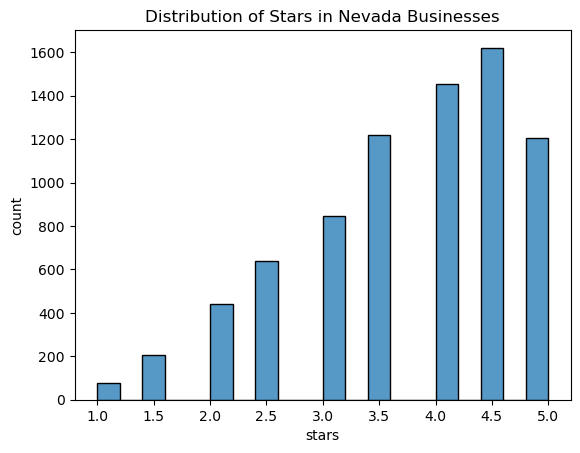

In [79]:
# create a histogram of the distribution of stars in nv_business using sns
sns.histplot(nv_business['stars'], kde=False, bins=20)
plt.xlabel('stars')
plt.ylabel('count')
plt.title('Distribution of Stars in Nevada Businesses')